In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
run1 = pd.read_csv("../data/dt_walker2d-medium-v2_log_22-02-20-06-27-12.csv")
run2 = pd.read_csv("../data/dt_walker2d-medium-v2_log_22-02-20-09-11-30.csv")
run3 = pd.read_csv("../data/dt_walker2d-medium-v2_log_22-02-22-09-24-12.csv")


(200, 6)


In [ ]:
run1_5k = run1[run1["num_updates"] >= 5000]
run1_x = run1_5k["num_updates"].to_numpy()
run1_y = run1.loc[run1_5k.index, "eval_avg_reward"].to_numpy()

run2_5k = run2[run2["num_updates"] >= 5000]
run2_x = run2_5k["num_updates"].to_numpy()
run2_y = run2.loc[run2_5k.index, "eval_avg_reward"].to_numpy()

run3_5k = run3[run3["num_updates"] >= 5000]
run3_x = run3_5k["num_updates"].to_numpy()
run3_y = run3.loc[run3_5k.index, "eval_avg_reward"].to_numpy()


In [33]:
y_avg = np.mean([run1_y, run2_y, run3_y], axis=0)
y_std = np.std([run1_y, run2_y, run3_y], axis=0)

print(y_avg[:5])
print(y_std[:5])



[ 951.96809017  989.68196603 1102.64219429 1026.71453397 1828.23758037]
[  5.20798544  47.38455816 206.7314148  101.14610026 615.56296612]


/var/folders/25/dm1wkhps30vcw00tp01rzgt80000gn/T/ipykernel_3158/1465847561.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


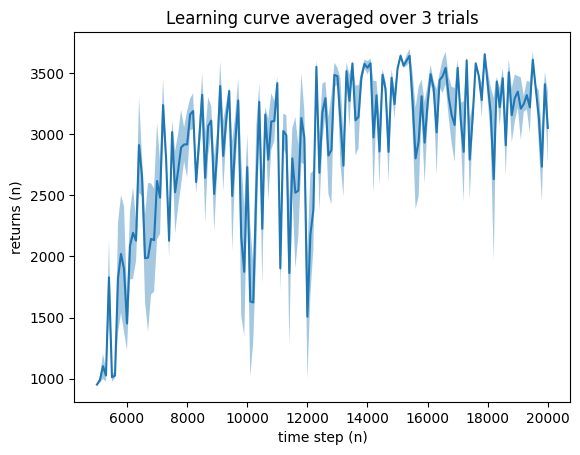

In [42]:
alpha = 0.5
y_std_alpha = 0.5 * y_std

fig, ax = plt.subplots(1,1)

ax.plot(run1_x, y_avg)

ax.fill_between(run1_x, y_avg - y_std_alpha, y_avg + y_std_alpha, alpha=0.4)

ax.set_title("Learning curve averaged over 3 trials")
ax.set_xlabel("time step (n)")
ax.set_ylabel("returns (n)")
fig.show()


/var/folders/25/dm1wkhps30vcw00tp01rzgt80000gn/T/ipykernel_3158/4044436036.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


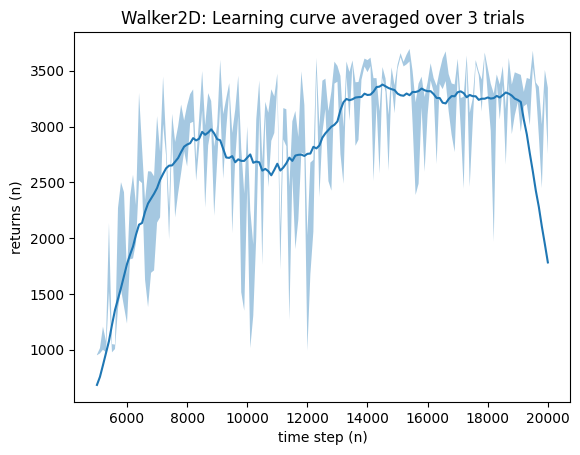

In [48]:
alpha = 0.5
y_std_alpha = 0.5 * y_std


window = run1.shape[0] // 10
weights = np.ones(window) / window
y_smoothed = np.convolve(y_avg, weights, mode='same')

fig, ax = plt.subplots(1,1)

ax.plot(run1_x, y_smoothed)

ax.fill_between(run1_x, y_avg - y_std_alpha, y_avg + y_std_alpha, alpha=0.4)

ax.set_title("Walker2D: Learning curve averaged over 3 trials")
ax.set_xlabel("time step (n)")
ax.set_ylabel("returns (n)")
fig.show()
